In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt


In [3]:
root_path = "./data/Classification/ip102_v1.1"

In [4]:
train_dataset = tf.keras.utils.image_dataset_from_directory(f"{root_path}/train",
                                                            shuffle=True,
                                                            batch_size=32,
                                                            image_size=(320, 320))
test_dataset = tf.keras.utils.image_dataset_from_directory(f"{root_path}/test",
                                                            shuffle=True,
                                                            batch_size=32,
                                                            image_size=(320, 320))
val_dataset = tf.keras.utils.image_dataset_from_directory(f"{root_path}/val",
                                                            shuffle=True,
                                                            batch_size=32,
                                                            image_size=(320, 320))

Found 45095 files belonging to 102 classes.
Found 22619 files belonging to 102 classes.
Found 7508 files belonging to 102 classes.


In [4]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
val_dataset = val_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

In [5]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal'),
  tf.keras.layers.RandomRotation(0.2),
])

In [6]:
model = tf.keras.Sequential([
  tf.keras.layers.Input((320, 320, 3)),
  data_augmentation,
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, (5,5), activation = 'relu'),
  tf.keras.layers.MaxPool2D((3,3)),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Conv2D(62, (3,3), activation = 'relu'),
  tf.keras.layers.MaxPool2D((2,2)),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Conv2D(128, (3,3), activation = 'relu'),
  tf.keras.layers.MaxPool2D((2,2)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(256, activation = 'relu'),
  tf.keras.layers.Dense(102, activation="softmax")
])

In [7]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 320, 320, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 320, 320, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 316, 316, 32)   │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 105, 105, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 105, 105, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 103, 103, 62)   │        17,918 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 51, 51, 62)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 51, 51, 62)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 49, 49, 128)    │        71,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 24, 24, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 73728)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 73728)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    18,874,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 102)            │        26,214 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,992,740 (72.45 MB)

 Trainable params: 18,992,740 (72.45 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=["accuracy"])

In [9]:
initial_epochs = 5

loss0, accuracy0 = model.evaluate(val_dataset)

235/235 ━━━━━━━━━━━━━━━━━━━━ 32s 135ms/step - accuracy: 0.0019 - loss: 4.6312


In [10]:
history = model.fit(train_dataset,
                    epochs=initial_epochs,
                    validation_data=val_dataset)

Epoch 1/5
1410/1410 ━━━━━━━━━━━━━━━━━━━━ 961s 680ms/step - accuracy: 0.0703 - loss: 4.2059 - val_accuracy: 0.0774 - val_loss: 4.1787
Epoch 2/5
1410/1410 ━━━━━━━━━━━━━━━━━━━━ 970s 688ms/step - accuracy: 0.0726 - loss: 4.1443 - val_accuracy: 0.0763 - val_loss: 4.1544
Epoch 3/5
1410/1410 ━━━━━━━━━━━━━━━━━━━━ 958s 679ms/step - accuracy: 0.0719 - loss: 4.1417 - val_accuracy: 0.0763 - val_loss: 4.1345
Epoch 4/5
1410/1410 ━━━━━━━━━━━━━━━━━━━━ 957s 678ms/step - accuracy: 0.0717 - loss: 4.1407 - val_accuracy: 0.0763 - val_loss: 4.1337
Epoch 5/5
1410/1410 ━━━━━━━━━━━━━━━━━━━━ 968s 687ms/step - accuracy: 0.0719 - loss: 4.1399 - val_accuracy: 0.0763 - val_loss: 4.1324


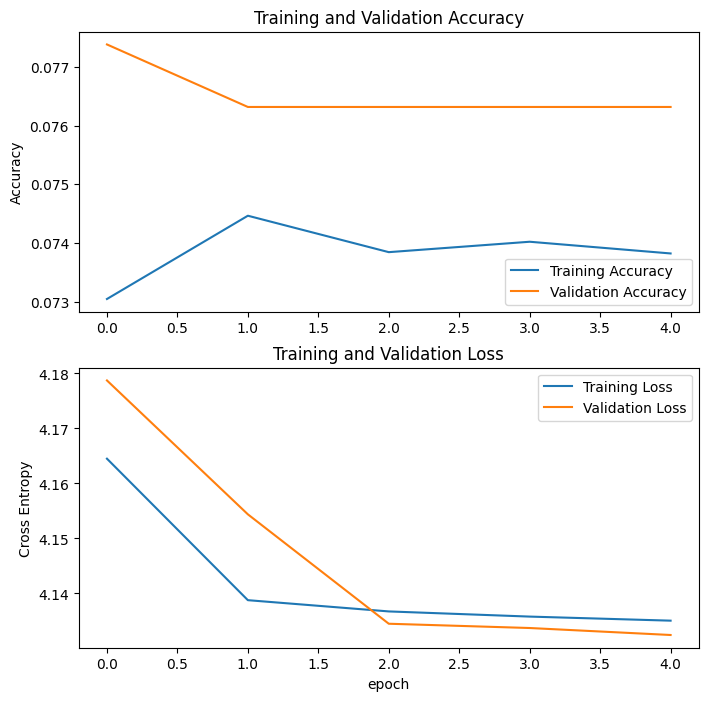

In [11]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
# plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
# plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [14]:
model.export("./api/model")

INFO:tensorflow:Assets written to: ./api/model\assets


INFO:tensorflow:Assets written to: ./api/model\assets


Saved artifact at './api/model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 320, 320, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 102), dtype=tf.float32, name=None)
Captures:
  2066823063936: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2066823064112: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2066823065872: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2066823066928: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2066823066048: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2066823067280: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2066823067632: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2066823068688: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2066823067808: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2066823069040: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2066823068512: TensorSpec(shape=(), d